In [1]:
#matplotlib is a data visualization library for python and pyplot is a collection
#of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
#pandas is a data analysis and manipulation library for python
import pandas as pd
#math is a std python library, import * imports everything from math
from math import *
#numpy is a array, matrix, and functions library for python
import numpy as np
#PdfPages from matplotlib.backends.backend_pdf allows us to export figures as a PDF
from matplotlib.backends.backend_pdf import PdfPages
#matplotlib is a data visualization library for python
import matplotlib as mpl
#os provides f(x)s for creating and removing directories, fetching contents etc.
import os

In [2]:
#setting matplot lib parameters to make sure font and font size for all graphs
#is the same
mpl.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = "12"
mpl.rcParams['mathtext.default'] = "regular"

In [3]:
## Azimuthal angles around the z-axis, for a total of 14 segments
thetas = ['015', '045', '075', '105', '135', '165', '195', '225', '255', '285', '315', '345',]
# z values at the center of each patch, from z = -22 to z = 27 Angstrom
zz = ['-25.33', '-18.09', '-10.86', '-3.62', '03.62', '10.86', '18.09', '25.33',]

In [4]:
#creating open lists so that we can later use a for loop to import th correct
#values from each simulation box
z_theta = []
Hbonds_all = []
HbondDetails = []
#setting the columns
Hcolumns = ['z','theta', 'Hbonds (all)']
#creates a hbond table, setting columns to Hcolumns
Hbonds_z_theta = pd.DataFrame(columns= Hcolumns)

In [5]:
#testing with the range of directories
for i in range(len(zz)):
	for j in range(len(thetas)):
		## First, theta
		theta = thetas[j]
		## Then z
		z = zz[i]
		#adds the theta and z values to the hbond table
		Hbonds_z_theta = Hbonds_z_theta.append([{'z':z, 'theta': theta}], ignore_index=True)
		#defines theta and phi to one decimal point
		# theta = "%.0f" % theta
		# z = "%.2f" % z
		#adding theta and phi to the empty theta_phi list
		z_theta.append("z = " + z + " , θ = " + theta + "°")
		#specifying the locations of the force, hbond, CDR3 hbond file, salt SaltBridges_heatmap
		#and salr_dir
		Hbond_all_file = "configurations/" + z + "_" + theta + "/hbonds.dat"
		HbondDetails.append("configurations/" + z + "_" + theta + "/hbonds-details.dat")
		#read the force file and hbonds files
		df_Hbonds_all = pd.read_csv(Hbond_all_file, sep = " ", header=0)
		#adds the hbonds file to the empty list
		Hbonds_all.append(df_Hbonds_all)

/tmp/ipykernel_86897/333688986.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Hbonds_z_theta = Hbonds_z_theta.append([{'z':z, 'theta': theta}], ignore_index=True)
/tmp/ipykernel_86897/333688986.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Hbonds_z_theta = Hbonds_z_theta.append([{'z':z, 'theta': theta}], ignore_index=True)
/tmp/ipykernel_86897/333688986.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Hbonds_z_theta = Hbonds_z_theta.append([{'z':z, 'theta': theta}], ignore_index=True)
/tmp/ipykernel_86897/333688986.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Hbonds_z_theta = Hbonds_z_theta.append([{'z':z, 'theta': 

         z theta Hbonds (all)
0   -25.33   015           13
1   -25.33   045            1
2   -25.33   075            0
3   -25.33   105            1
4   -25.33   135            0
..     ...   ...          ...
91   25.33   225            0
92   25.33   255           12
93   25.33   285            0
94   25.33   315            3
95   25.33   345            5

[96 rows x 3 columns]


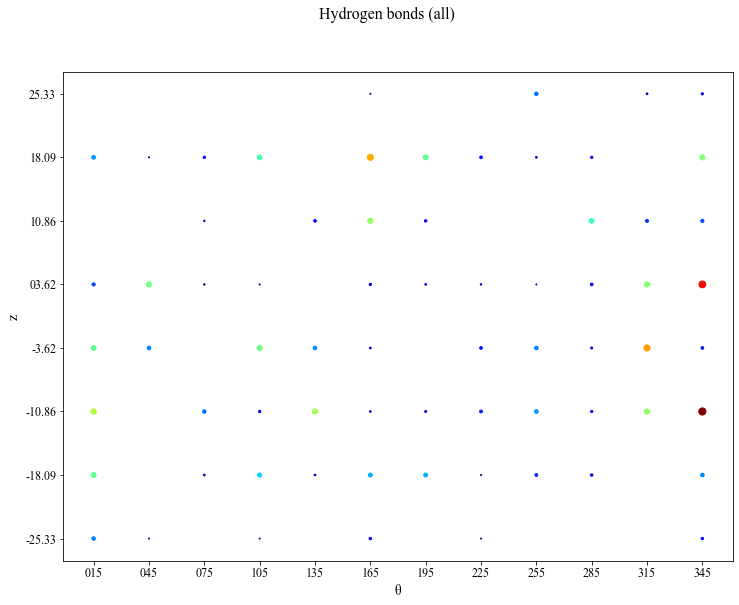

In [6]:
with PdfPages('hbonds_hm.pdf') as pdf:
	#i is up to 96 based on the number of simulations
	for i in range (96):
		#adds the list containing the force values and hbonds to frames,
		#concatanation is necessary since 'data' and 'Hbonds' are just lists
		frame = pd.concat(Hbonds_all, axis = 1)

		#defines the figure size and sets the subtitle to the coordinates (theta_phi)
		fig = plt.figure(figsize=(12,9))
		fig.suptitle(z_theta[i], fontsize=16)

		# First, plotting the radial force
		#(2,2,1) inidcates the nrows, ncols, index, meaning the pdf has 2 columns
		#2 rows, and this figure is in index 1 (top left corner)
		ax = fig.add_subplot(2,1,1)
		ax.axhline(0, color='black', linestyle = ":")

		# Second, the hydrogen bonds
		#plotting all hbonds, divide by 100 to turn into ns [:,0] selects
		#first column which is time
		#for some reason the 2+2 for the upper limit of columns goes to the
		#right number of columns, b/c syntax
		ax.plot(frame.iloc[:, i*2:i*2+2].iloc[:, 0]/100, frame.iloc[:, i*2:i*2+2].iloc[:, 1], color = "r", label = "all")
		#AOC stands for
		AOC = frame.iloc[:, i*2:i*2+2].iloc[:, 1].sum()
		Hbonds_z_theta.at[i, "Hbonds (all)"] = AOC
		ax.text(0.5 ,5, "AOC = " + str(AOC))
		ax.set_title("Hydrogen bonds (MtDARPin and T3Q)")
		ax.set_ylim([-0.5, 1])
		ax.set_xlabel("time (ns)")
		ax.set_ylabel("#H-bonds")

		# Lastly, text information about hydrogen bonds
			#specify encoding the file or for writing the file
		ax2 = fig.add_subplot(2,1,2)
		ax2.axis('off')
		with open(HbondDetails[i]) as hd:
			d = hd.read()
			ax2.text(0,-0.2, d)


		# pdf.savefig()
		plt.close()

		# Hydrogen bonds scatter plot (all residues)
	#set a figure size
	Hbonds_heatmap = plt.figure(figsize=(12,9))
	#set a subtitle
	Hbonds_heatmap.suptitle("Hydrogen bonds (all)", fontsize=16)
	#add plot
	ax = Hbonds_heatmap.add_subplot(1,1,1)
	#set x and y
	ax.set_ylabel("z", fontsize=14)
	ax.set_xlabel("θ", fontsize=14)
	#hydrogen bond is scatter plot
	print(Hbonds_z_theta)
	#save hbonds data if you want to graph it somewhere else
	Hbonds_z_theta.to_csv('MtDARPin_hb_1.csv', index=False)
	hb = ax.scatter(Hbonds_z_theta['theta'], Hbonds_z_theta['z'], c= Hbonds_z_theta['Hbonds (all)'].astype(int) , s= Hbonds_z_theta['Hbonds (all)'].astype(int), cmap="jet")
	#create a loop
	# for i in range(len(Hbonds_z_theta['theta'])):
	# 	#create a txt
	# 	txt = str(round(Hbonds_z_theta['z'][i], 1)) + "\n" + str(round(Hbonds_z_theta['theta'][i], 1))
	# 	#annotate with the text
	# 	ax.annotate(txt, (Hbonds_z_theta['theta'][i], Hbonds_z_theta['z'][i]), fontsize=8)

	# ax.invert_yaxis()
	# cb = Hbonds_heatmap.colorbar(hb, ax=ax)
	# cb.set_label('H-bonds (time-accumulated count)')
	# # pdf.savefig()
	# plt.close()

In [7]:
# print(frame)